# **Problem Statement**

Predict Fuel Efficiency in Miles Per Gallon (MPG) of cars using various features like Engine displacement, Horsepower, Weight ,acceleration

This is a regression problem, and it’s common in automotive engineering.

### **Dataset:**
We'll use the Auto MPG dataset from the UCI Machine Learning Repository. It is small, clean, and great for regression tasks.

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"



### ✅ **Full Workflow:**

1. Load and clean data
2. Visualize features
3. Preprocess (e.g., handle missing values)
4. Train-test split
5. Train Linear Regression
6. Evaluate with MSE/R²
7. Plot predictions vs actual

## **1. Load Dataset**

In [24]:
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
urllib.request.urlretrieve(url, "auto-mpg.data")

('auto-mpg.data', <http.client.HTTPMessage at 0x7c7efa1c3150>)

## **2. Preview Dataset**

In [45]:
import pandas as pd

# Define column names (as per UCI dataset description)
column_names = [
    "mpg", "cylinders", "displacement", "horsepower", "weight",
    "acceleration", "model_year", "origin", "car_name"
]

# Load the dataset
df = pd.read_csv("auto-mpg.data", names=column_names,  sep='\s+', na_values='?')
#sep='\s+' means: "Split the data wherever there's one or more whitespace characters."

# Preview the first few rows
print(df.head())




    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [46]:
print("Size in bytes:", df.memory_usage(deep=True).sum())
print("Shape (rows, columns):", df.shape)

Size in bytes: 54696
Shape (rows, columns): (398, 9)


## **3. Handle Missing Values**

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


<Axes: >

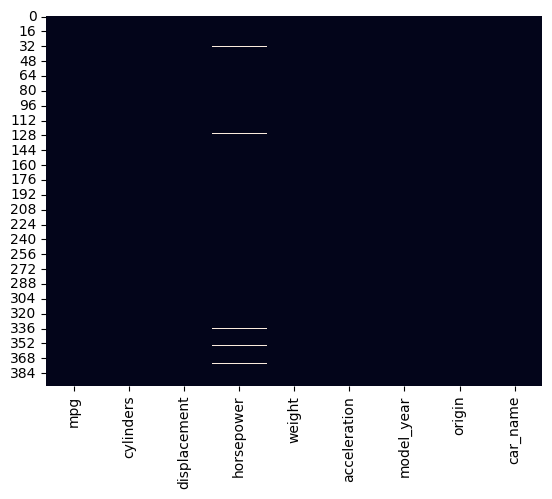

In [47]:
#Ways to show missing Values

print(df.isnull().sum())

import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [19]:
#Option A: Drop Rows with Missing Values
print(f"Number of rows before Droping: {len(df)}")
df = df.dropna()
print(f"Remaining rows: {len(df)}")

Number of rows before Droping: 398
Remaining rows: 398


In [48]:
#Option B : Fill Missing Values with Mean/Median
mean_hp = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].fillna(mean_hp)

## **4. Exploratory Data Analysis (EDA) & Feature Selection**

Exploratory Data Analysis (EDA)
│
├── Check structure (df.info, df.describe)
├── Visualize distributions (histograms, boxplots)
├── Identify missing values & outliers
├── Correlation matrix 📌 ← Helps detect relationships
│     └── Leads to...
└── Feature Selection ✅ (based on correlation, importance, or domain logic)


Our goal is to:

Understand which features are correlated with mpg (miles per gallon)

Select only meaningful numerical features for the regression model

### **4.1. Check Correlation with Target (mpg)**

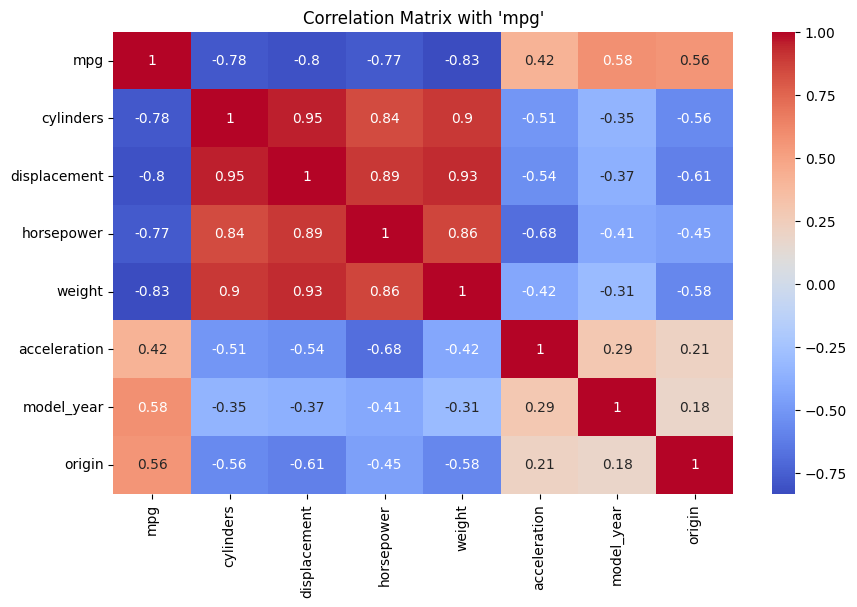

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with 'mpg'")
plt.show()


As per above Heatmap, Focus on the first row/column (mpg):
These values tell you how each input feature is correlated with the target output (mpg).

Example:
weight: -0.83 → strong negative correlation
means: As weight increases, mpg tends to decrease.


**Thumb Rules for Correlation-Based Feature Selection**

| Correlation Value (|r|) | Interpretation | Should You Use It? |

| 0.7 – 1.0 | Strong correlation | ✅ Definitely useful |

| 0.5 – 0.7 | Moderate correlation | ✅ Usually useful |

| 0.3 – 0.5 | Weak correlation | ⚠️ Use with care |

| < 0.3 | Very weak / no correlation | ❌ Often discard |


Focus on features with strong negative or positive correlation with mpg

Example:

weight (usually negative correlation)

horsepower, displacement (moderate correlation)

acceleration (may vary)


### **4.2. Select Features for Modeling without considering VIF**

We will drop:

car_name (non-numeric)

origin, model_year (for simplicity)

In [50]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
target = 'mpg'

X = df[features]
y = df[target]


### **5. Train-Test Split and Model Training Considering 5 features**

Now that we’ve selected the best features,we’ll:

1. Split the data into training and testing sets

2. Train a Linear Regression model

3. Evaluate its performance

### **5.1 Setup and Split Data**

In [51]:
from sklearn.model_selection import train_test_split

# Final selected features
X = df[['cylinders', 'displacement','horsepower', 'weight', 'acceleration']]
y = df['mpg']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 318, Test size: 80


### **5.2: Train the Model**

In [52]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model_1 = LinearRegression()
model_1.fit(X_train, y_train)


LinearRegression()

### **5.3: Evaluate the Model**

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model_1.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 14.67
R² Score: 0.73


### **5.4: View Model Equation**

In [54]:
# Show model equation
coef = model_1.coef_
intercept = model.intercept_

for feat, c in zip(X.columns, coef):
    print(f"{feat}: {c:.4f}")
print(f"Intercept: {intercept:.4f}")


cylinders: -0.1940
displacement: -0.0064
horsepower: -0.0415
weight: -0.0052
acceleration: -0.0350
Intercept: 46.3851


Great — you’ve printed out the **full model equation** from your trained Linear Regression model.

---

## ✅ Model Equation:

$$
\text{mpg} = 46.2189 - 0.1940 \cdot \text{cylinders} - 0.0064 \cdot \text{displacement} - 0.0415 \cdot \text{horsepower} - 0.0052 \cdot \text{weight} - 0.0350 \cdot \text{acceleration}
$$

---

## 🧠 Interpretation:

| Feature        | Coefficient | Meaning                                  |
| -------------- | ----------- | ---------------------------------------- |
| `cylinders`    | -0.1940     | More cylinders → lower mpg (as expected) |
| `displacement` | -0.0064     | Larger engines → slightly lower mpg      |
| `horsepower`   | -0.0415     | Higher power → lower mpg                 |
| `weight`       | -0.0052     | Heavier car → lower mpg                  |
| `acceleration` | -0.0350     | Slight negative impact on mpg            |

🟡 All coefficients are **negative**, meaning **each increase** in these features leads to **lower fuel efficiency** (which aligns well with vehicle physics).

---

### **6. Select Features for Modeling with considering VIF**

In [55]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select your feature matrix
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

# Add constant term for intercept
X = X.copy()
X['intercept'] = 1

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        Feature         VIF
0     cylinders   10.583910
1  displacement   19.601479
2    horsepower    8.247109
3        weight   10.147416
4  acceleration    2.493358
5     intercept  151.477162




### 🔧 Example (like your case):

| Feature        | Corr with mpg | VIF  | Action                 |
| -------------- | ------------- | ---- | ---------------------- |
| `displacement` | -0.80         | 19.6 | ❌ Drop (too redundant) |
| `horsepower`   | -0.77         | 8.2  | ✅ Keep                 |
| `weight`       | -0.83         | 10.1 | ✅ Keep                 |
| `acceleration` | +0.42         | 2.5  | ✅ Keep                 |
| `cylinders   ` | -0.78         | 10.58| ❌ Drop (too redundant) |


Option A: Drop displacement
It has the highest VIF (19.6)

It's also highly correlated with both horsepower and weight

You can keep horsepower (more directly related to performance)

⚠️ Optionally Drop cylinders or weight
If weight is a critical real-world parameter (which it often is), keep it

cylinders may be redundant with displacement and horsepower

In [56]:
features = ['horsepower', 'weight', 'acceleration']
target = 'mpg'

X = df[features]
y = df[target]


### **6. Train-Test Split and Model Training Considering VIF - 3 features**

Now that we’ve selected the best features,we’ll:

1. Split the data into training and testing sets

2. Train a Linear Regression model

3. Evaluate its performance

### **6.1 Setup and Split Data**

In [64]:
from sklearn.model_selection import train_test_split

# Final selected features
X = df[['horsepower', 'weight', 'acceleration']]
y = df['mpg']

# Split into 80% train and 20% test
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 318, Test size: 80


### **6.2: Train the Model**

In [65]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model_2 = LinearRegression()
model_2.fit(X2_train, y2_train)


LinearRegression()

### **6.3: Evaluate the Model**

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y2_pred = model_2.predict(X2_test)

# Evaluation
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 14.61
R² Score: 0.73


### **6.4: View Model Equation**

In [71]:
# Show model equation
coef = model_2.coef_
intercept = model.intercept_

for feat, c in zip(X.columns, coef):
    print(f"{feat}: {c:.4f}")
print(f"Intercept: {intercept:.4f}")


horsepower: -0.0465
weight: -0.0061
acceleration: 0.0013
Intercept: 46.3851


### **7. Plot Actual vs Predicted values**

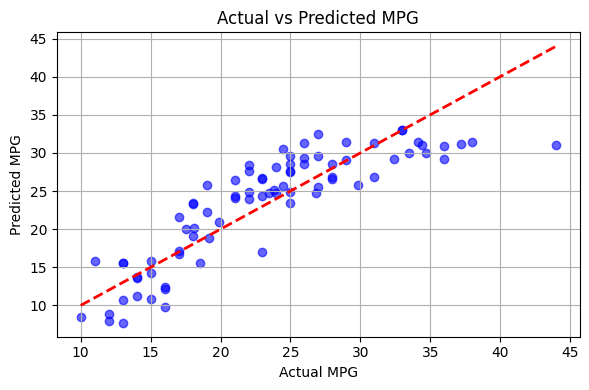

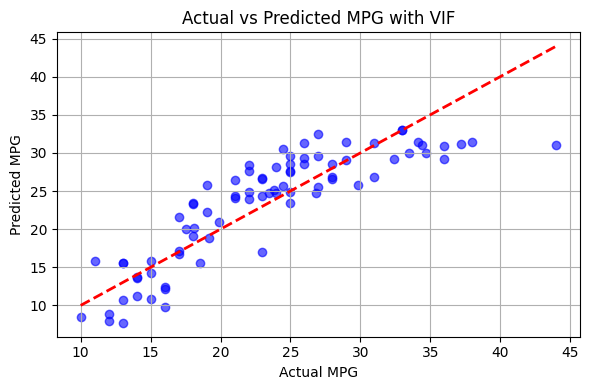

In [70]:
import matplotlib.pyplot as plt

# y_test: actual MPG values
# y_pred: predicted MPG values from your model

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y2_test, y2_pred, color='blue', alpha=0.6)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG with VIF')
plt.grid(True)
plt.tight_layout()
plt.show()

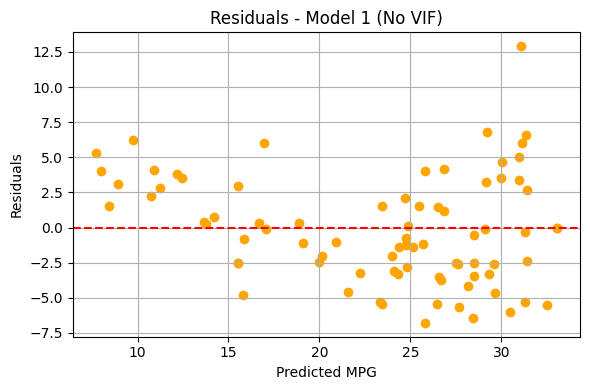

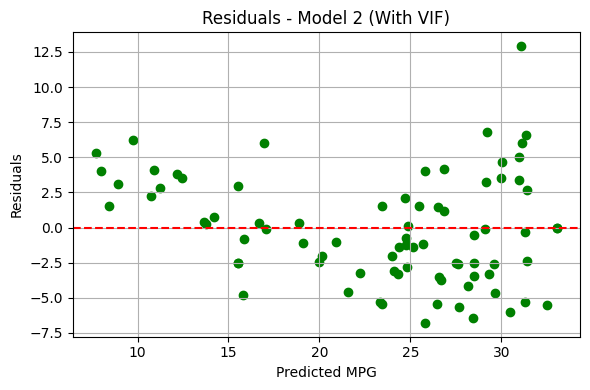

In [72]:
residuals_1 = y_test - y_pred
residuals_2 = y2_test - y2_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals_1, color='orange')
plt.title("Residuals - Model 1 (No VIF)")
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y2_pred, residuals_2, color='green')
plt.title("Residuals - Model 2 (With VIF)")
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()
